# Worksheet 19

Name: shivacharan oruganti
UID: U55255882

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.994336542422525
0.9944025997598296
0.9946063621874719
0.9946090709900876
0.9946119430044237
0.9946172883494697
0.9946229499328
0.9946567791465966
0.9948616618113829
0.9948822422440247
0.9949091725486209
0.9949524122378414
0.9949283148939926
0.9949403835215432


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[0, 0, 0, 1, 1]
0.3125


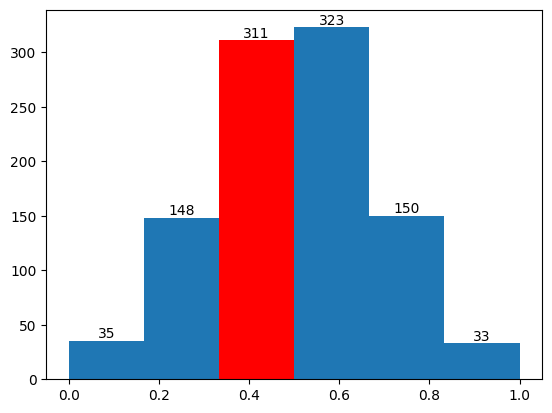

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

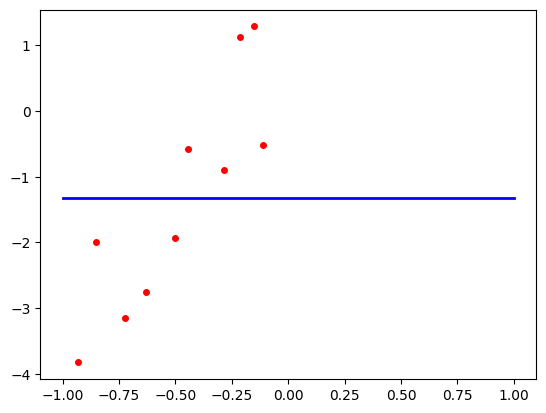

In [5]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10
beta = [1, 5]
xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = beta[0] + beta[1] * xlin+ np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.array([np.mean(y), 0])

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

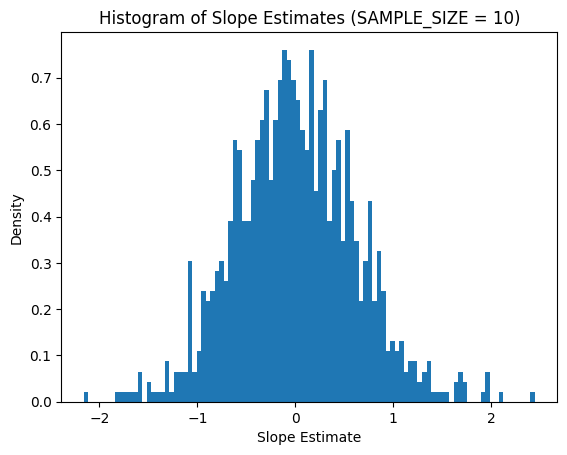

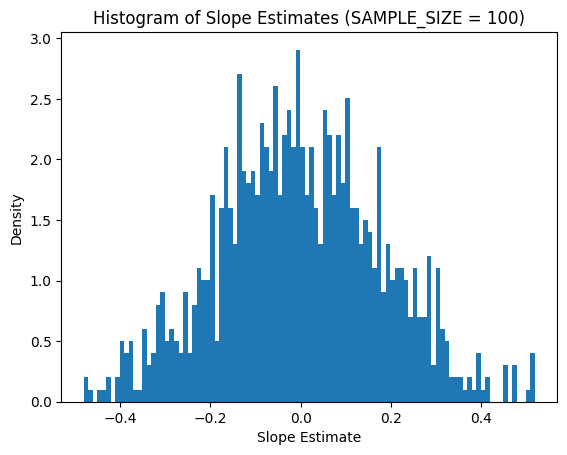

In [6]:
beta_hist = []

# We will perform the simulation 1000 times for the first part
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Uniformly distributed x values
    y = beta[0] + beta[1] * xlin + np.random.randn(SAMPLE_SIZE)  # y values with noise
    X = np.vstack([np.ones(SAMPLE_SIZE), xlin]).T  # Design matrix
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # Ordinary least squares estimate
    beta_hist.append(beta_hat[1])  # We're interested in the slope estimate

# Plotting the histogram of the slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_title('Histogram of Slope Estimates (SAMPLE_SIZE = 10)')
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Density')
plt.show()

# To see what happens when we increase the sample size, let's repeat the simulation with a larger sample size
SAMPLE_SIZE_LARGER = 100
beta_hist_larger_sample = []

for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE_LARGER)  # Uniformly distributed x values for larger sample
    y = beta[0] + beta[1] * xlin + np.random.randn(SAMPLE_SIZE_LARGER)  # y values with noise for larger sample
    X = np.vstack([np.ones(SAMPLE_SIZE_LARGER), xlin]).T  # Design matrix for larger sample
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # OLS estimate for larger sample
    beta_hist_larger_sample.append(beta_hat[1])  # Storing the slope estimate

# Plotting the histogram of the slope estimates for the larger sample size
fig, ax = plt.subplots()
ax.hist(beta_hist_larger_sample, bins=100, density=True)
ax.set_title('Histogram of Slope Estimates (SAMPLE_SIZE = 100)')
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Density')
plt.show()

the histograms show that as the sample size increases, the variance of the slope estimates decreases, leading to more precise estimation. 

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

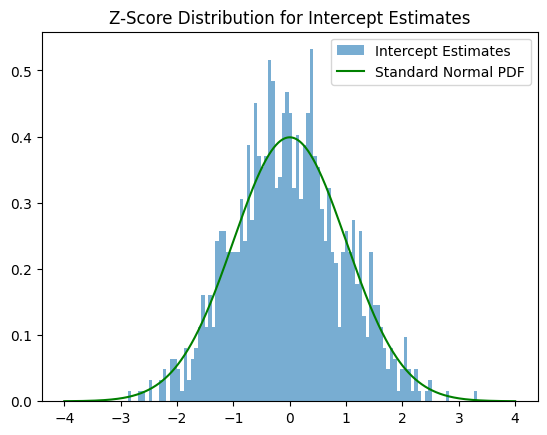

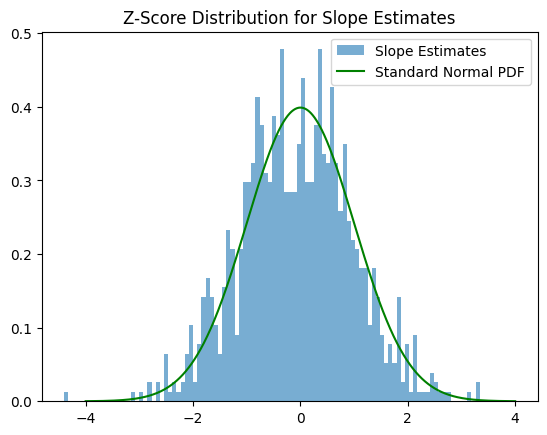

In [7]:
from scipy.stats import norm

SAMPLE_SIZE = 100
beta_hist_intercept = []
beta_hist_slope = []

for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = beta[0] + beta[1] * xlin + np.random.randn(SAMPLE_SIZE)
    X = np.vstack([np.ones(SAMPLE_SIZE), xlin]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    S = np.linalg.inv(X.T @ X)
    sigma_squared = np.var(y - X @ beta_hat, ddof=2)  # Estimate of the variance of the errors

    # Z-scores for intercept and slope
    z_intercept = (beta_hat[0] - beta[0]) / np.sqrt(sigma_squared * S[0, 0])
    z_slope = (beta_hat[1] - beta[1]) / np.sqrt(sigma_squared * S[1, 1])

    beta_hist_intercept.append(z_intercept)
    beta_hist_slope.append(z_slope)

# Normal pdf
xs = np.linspace(-4, 4, 1000)

# Plotting the histogram and the standard normal pdf for intercept
fig, ax = plt.subplots()
ax.hist(beta_hist_intercept, bins=100, density=True, alpha=0.6, label='Intercept Estimates')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal PDF')
ax.set_title('Z-Score Distribution for Intercept Estimates')
ax.legend()
plt.show()

# Plotting the histogram and the standard normal pdf for slope
fig, ax = plt.subplots()
ax.hist(beta_hist_slope, bins=100, density=True, alpha=0.6, label='Slope Estimates')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal PDF')
ax.set_title('Z-Score Distribution for Slope Estimates')
ax.legend()
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

/Users/shiva/.pyenv/versions/3.11.2/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


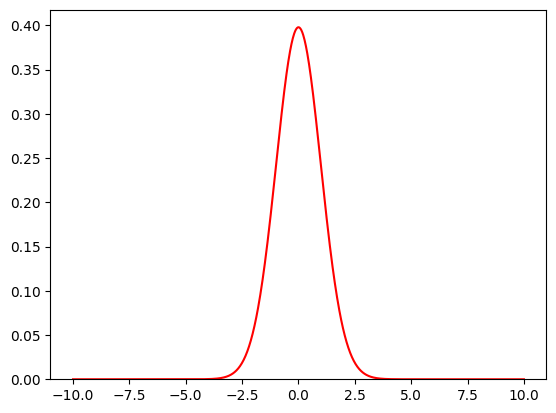

In [10]:
from scipy.stats import t

def standard_error(y_true, y_pred, p, n):
    rss = np.sum((y_true - y_pred) ** 2)
    return np.sqrt(rss / (n - p))

# Initialize list to store the t-statistics
beta_hist_t_stat_intercept = []
beta_hist_t_stat_slope = []

# Run simulation 1000 times
for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = beta[0] + beta[1] * xlin + np.random.randn(SAMPLE_SIZE)
    X = np.vstack([np.ones(SAMPLE_SIZE), xlin]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ beta_hat
    S = np.linalg.inv(X.T @ X)
    s = standard_error(y, y_pred, 2, SAMPLE_SIZE) 

    # t-statistic for intercept and slope
    t_stat_intercept = (beta_hat[0] - beta[0]) / (s * np.sqrt(S[0, 0]))
    t_stat_slope = (beta_hat[1] - beta[1]) / (s * np.sqrt(S[1, 1]))

    beta_hist_t_stat_intercept.append(t_stat_intercept)
    beta_hist_t_stat_slope.append(t_stat_slope)


xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


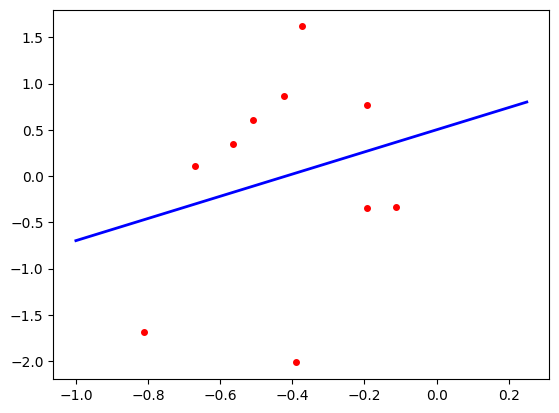

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [ ]:
two-tailed p-value is approximately 0.8253.